c:\Users\amaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\amaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\amaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\amaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\amaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Line

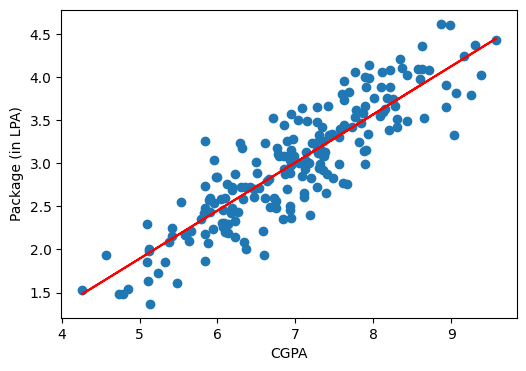

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and prepare the dataset
df = pd.read_csv('placement.csv')
X = df[['cgpa']]  # Input column (CGPA)
y = df['package']  # Output column (Package)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Create the function to predict the package based on CGPA
def predict_package():
    try:
        cgpa = float(entry_cgpa.get())  # Get CGPA from the input field
        predicted_package = lr.predict(np.array([[cgpa]]))[0]  # Predict the package
        label_predicted.config(text=f'Predicted Package: {predicted_package:.2f} LPA')
    except ValueError:
        label_predicted.config(text="Invalid input. Please enter a valid CGPA.")

# Create the GUI using Tkinter
root = tk.Tk()
root.title('Placement Package Predictor by Amaan Shaikh')
root.geometry('800x400')

# Create a figure and a scatter plot with the regression line
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(df['cgpa'], df['package'])
ax.set_xlabel('CGPA')
ax.set_ylabel('Package (in LPA)')
ax.plot(X_train, lr.predict(X_train), color='red')

# Embed the plot in the Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

# Create the input frame on the right side of the window
frame_right = tk.Frame(root)
frame_right.pack(side=tk.RIGHT, padx=20)

# Add widgets to input CGPA and predict the package
label_cgpa = tk.Label(frame_right, text='Enter CGPA:')
label_cgpa.pack()

entry_cgpa = tk.Entry(frame_right)
entry_cgpa.pack()

btn_predict = tk.Button(frame_right, text='Predict', command=predict_package)
btn_predict.pack()

label_predicted = tk.Label(frame_right, text='Predicted Package:')
label_predicted.pack()

# Run the Tkinter main loop
root.mainloop()
